In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


[Notebook Link](https://www.kaggle.com/code/yashrajsinhsolanki/employee-attrition-performance)

In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(df.describe)

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [6]:
df.drop(columns=['EmployeeCount' , 'EmployeeNumber'] , inplace = True)

In [7]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                   

In [8]:
pd.set_option('future.no_silent_downcasting', True)

df['Attrition'] = df['Attrition'].replace({'Yes':1 , 'No':0})

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [11]:
print(df.duplicated().sum())

0


In [12]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

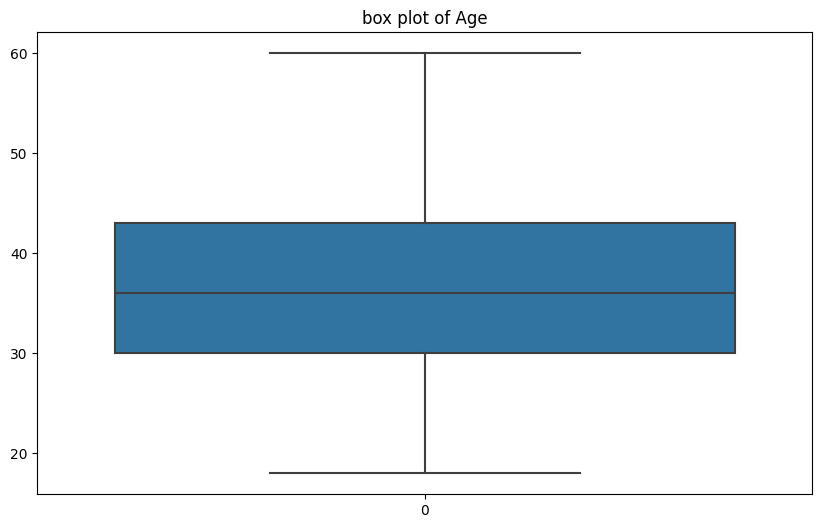

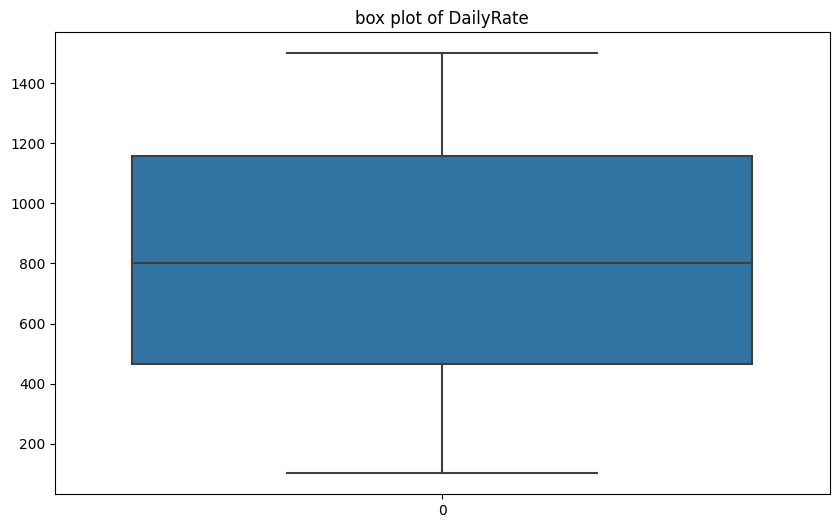

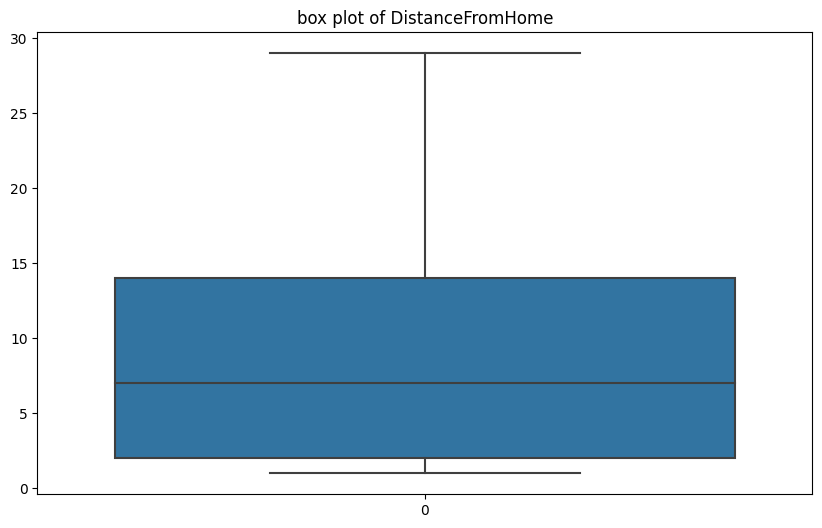

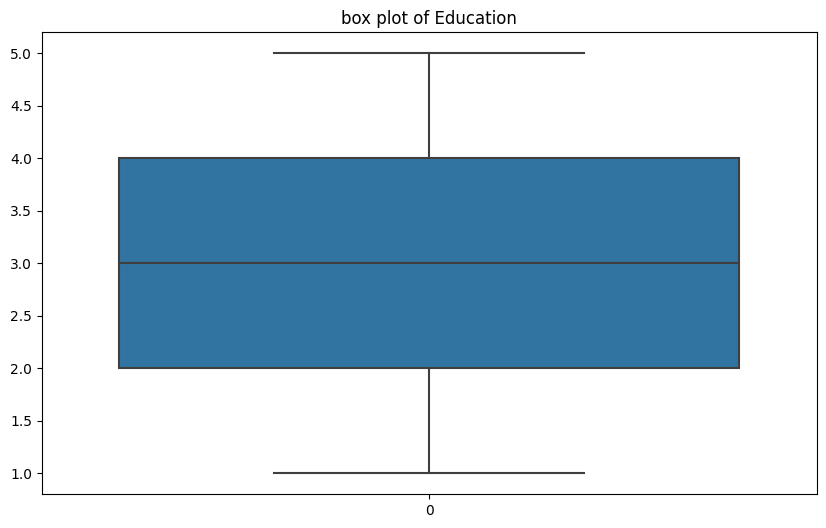

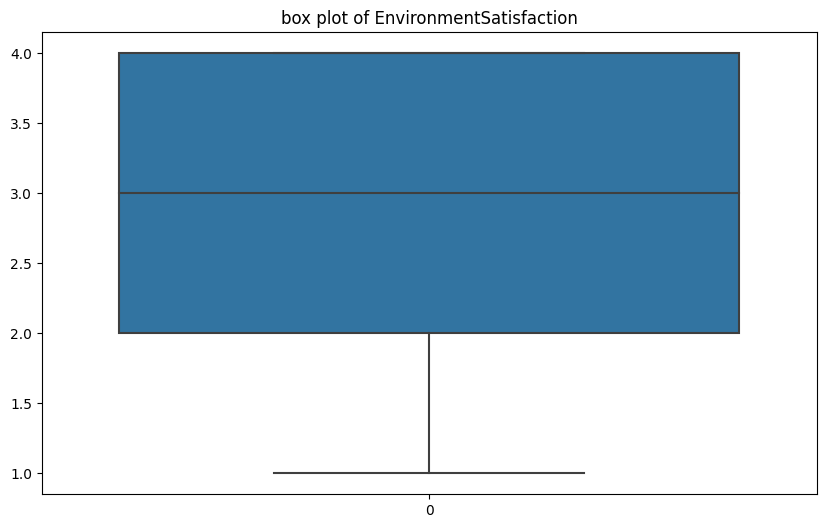

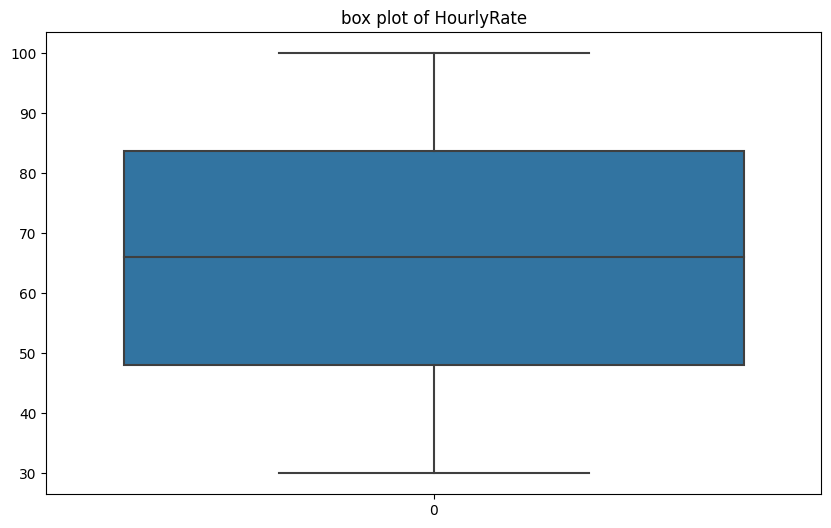

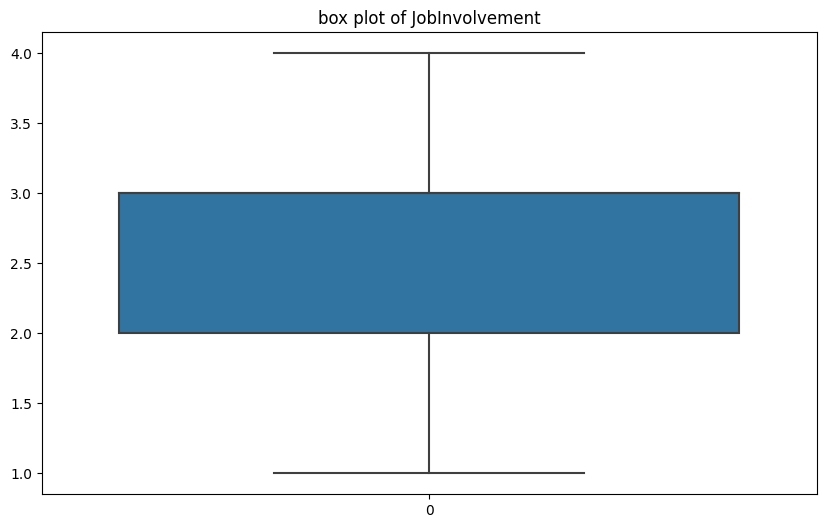

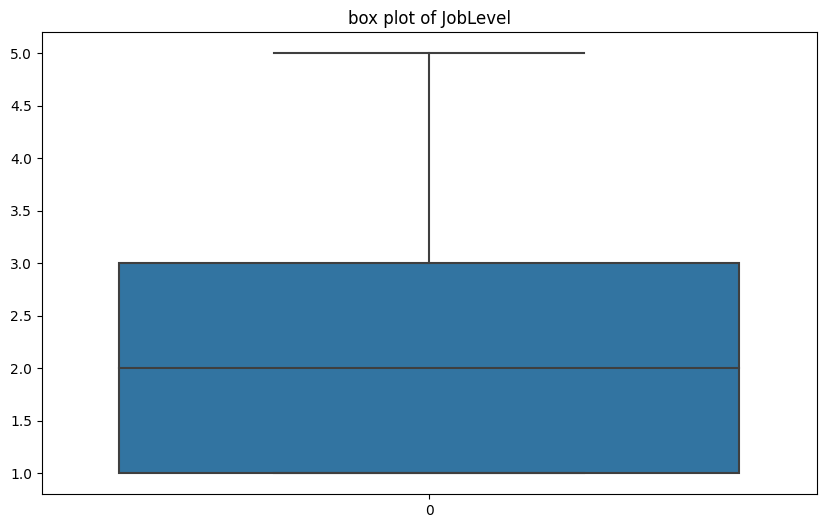

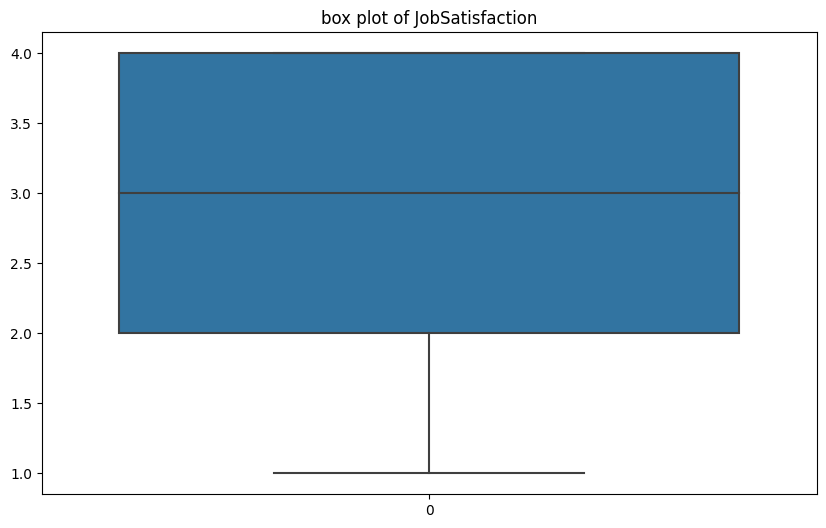

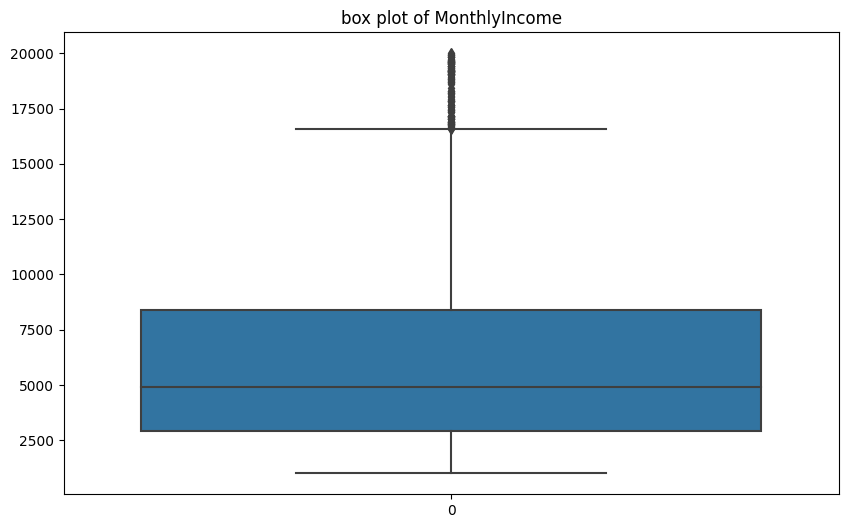

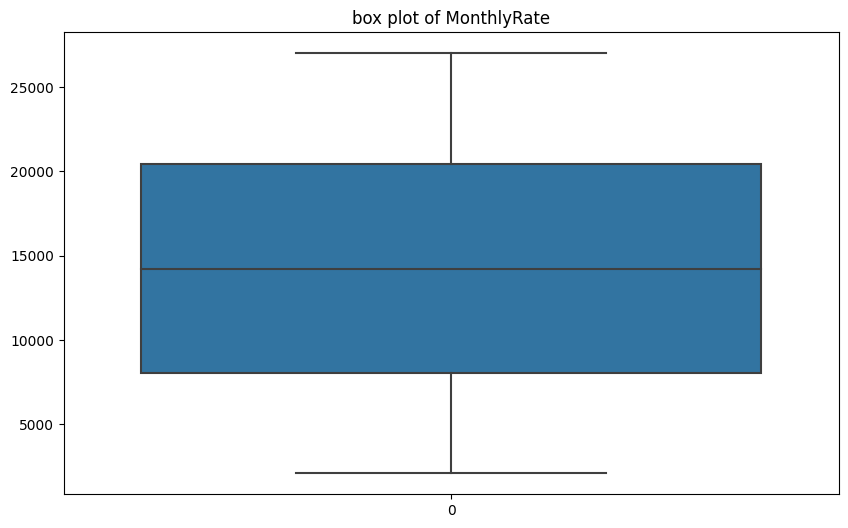

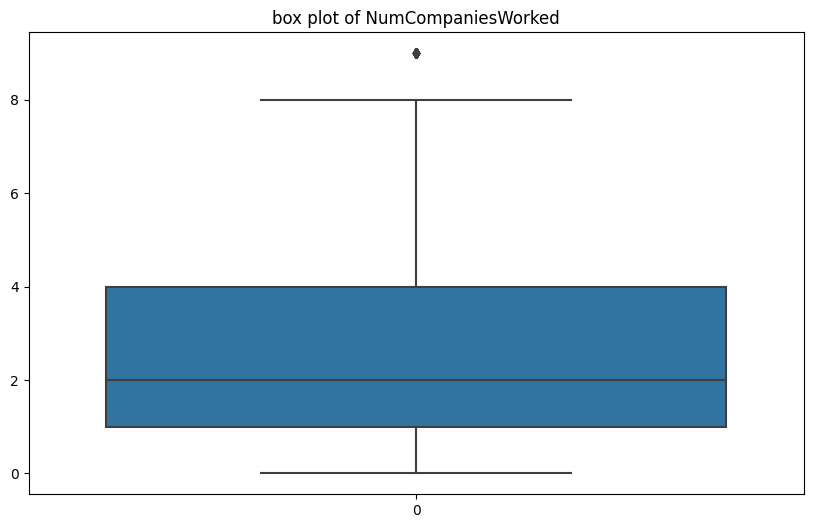

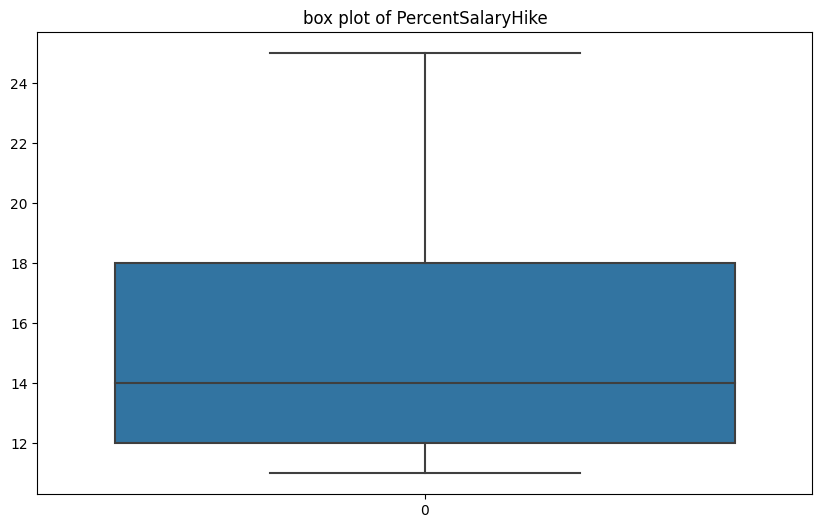

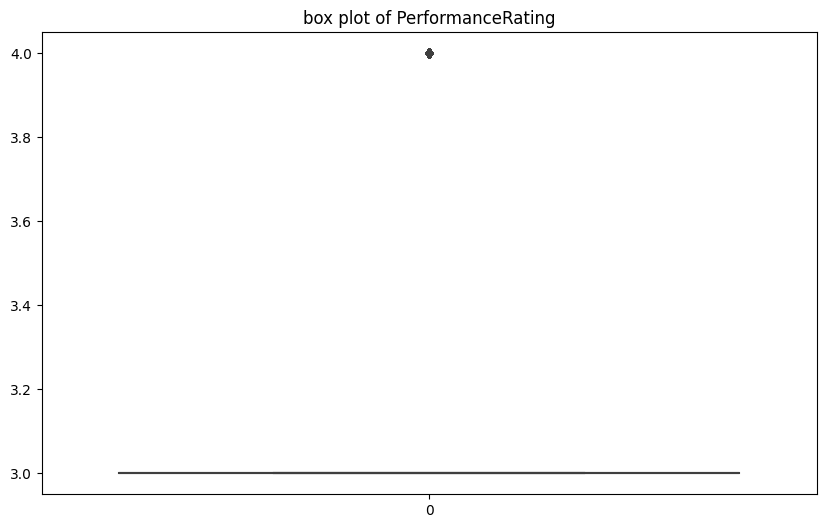

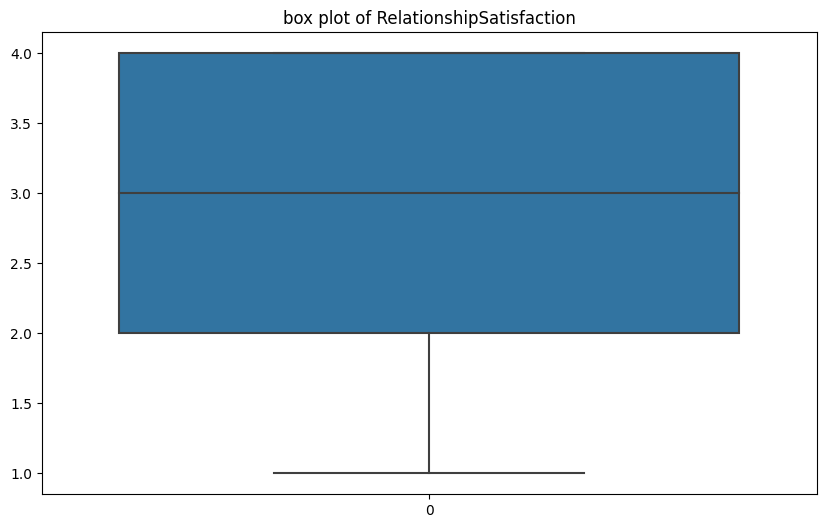

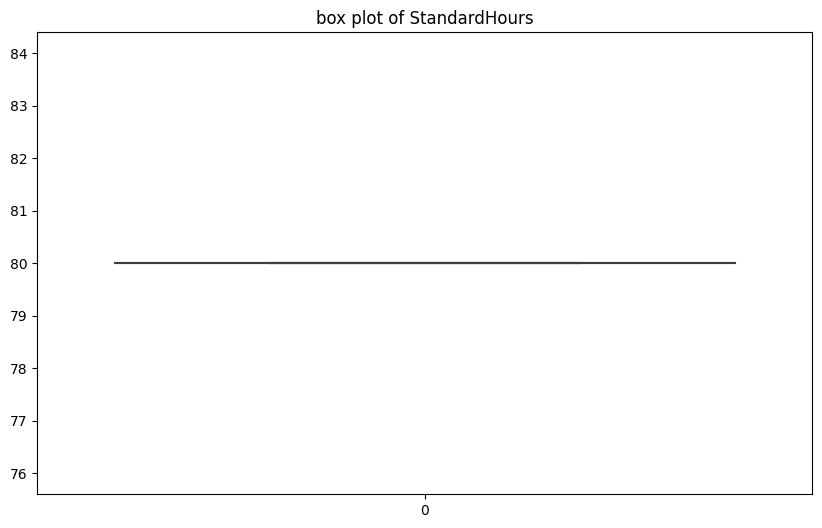

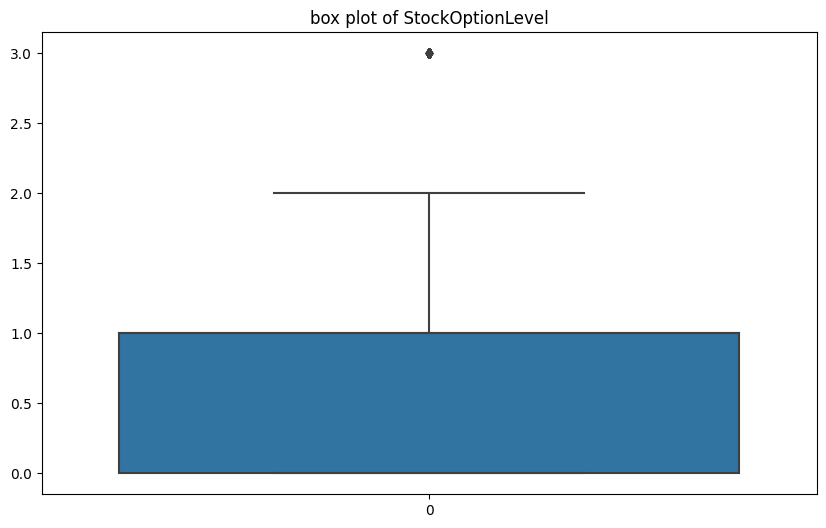

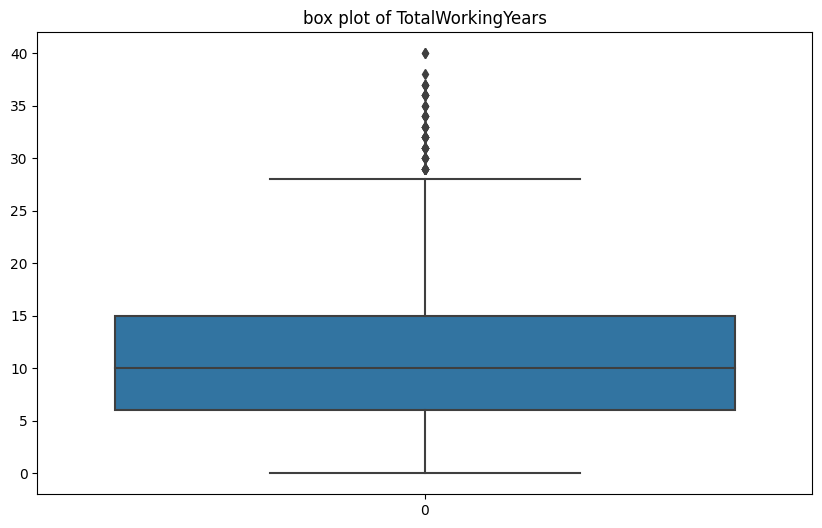

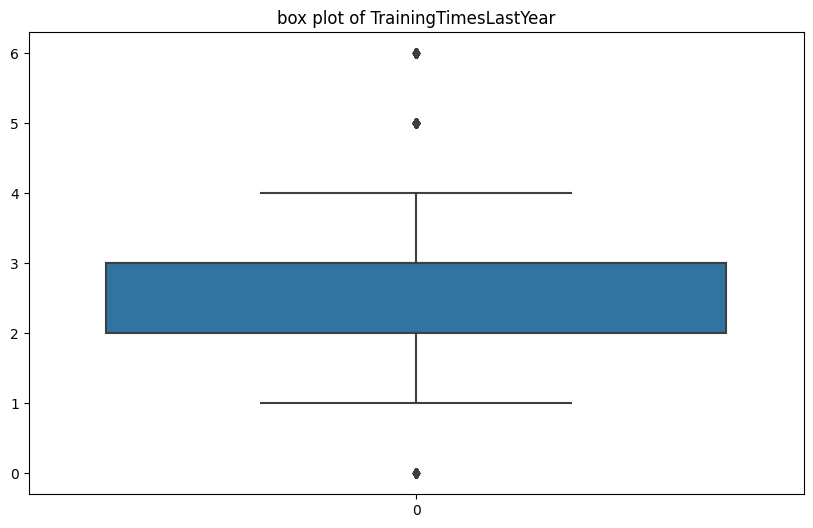

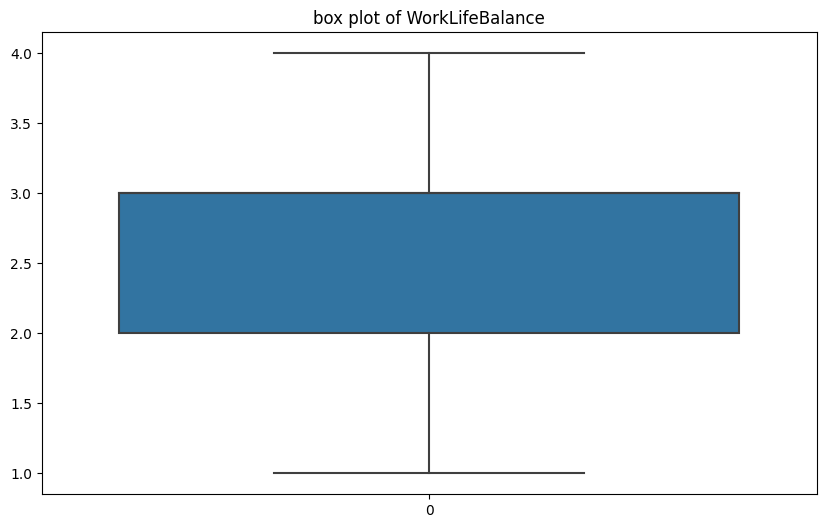

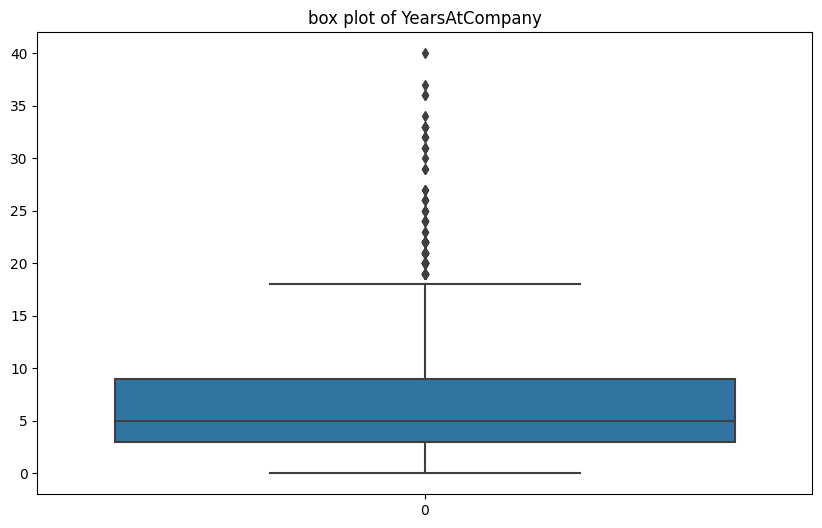

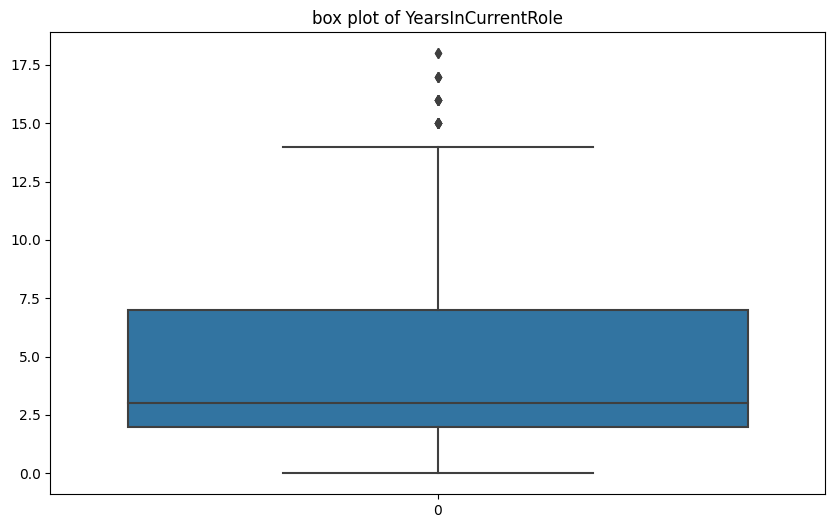

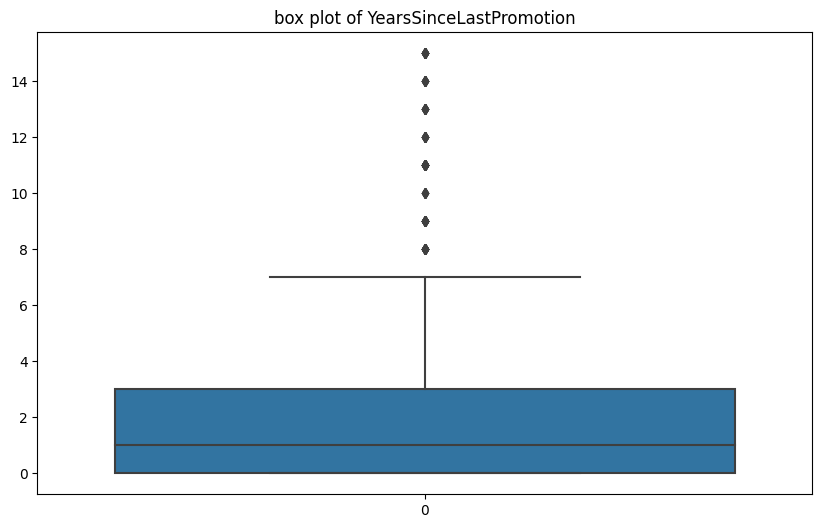

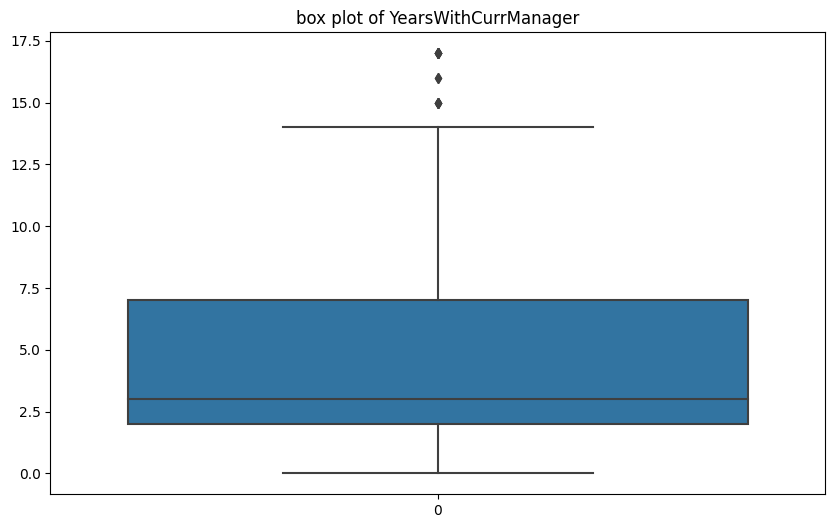

In [13]:
ColsBox = df.select_dtypes('int64')
for col in ColsBox.columns:
    plt.figure(figsize=(10,6))
    plt.title('box plot of '+col)
    sns.boxplot(df[col])
    plt.show()

In [14]:
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 2 * iqr
        upper_bound = q3 + 2 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [15]:
df = remove_outliers(df)

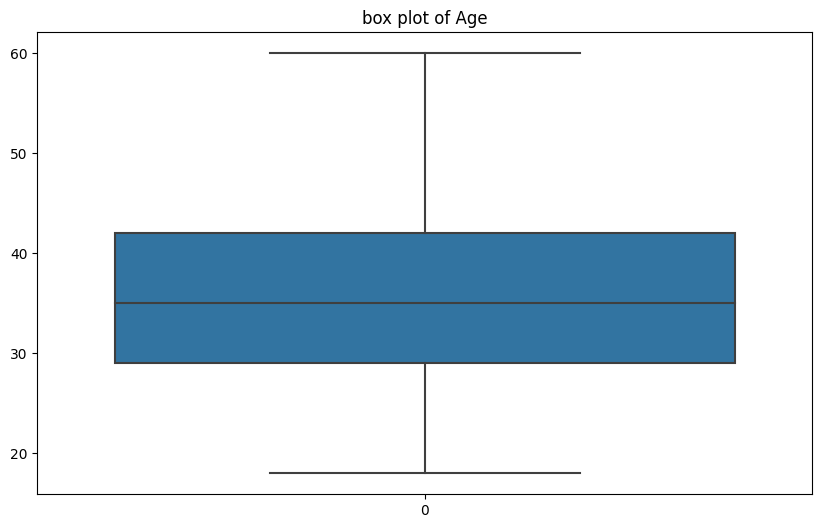

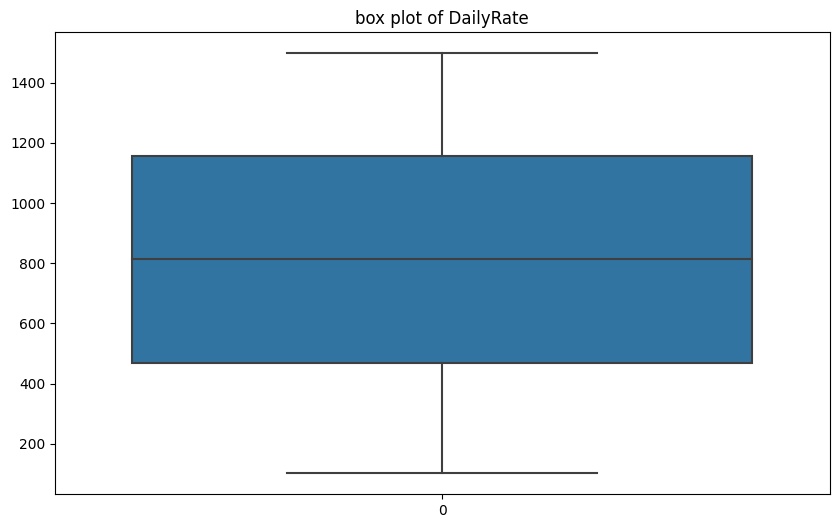

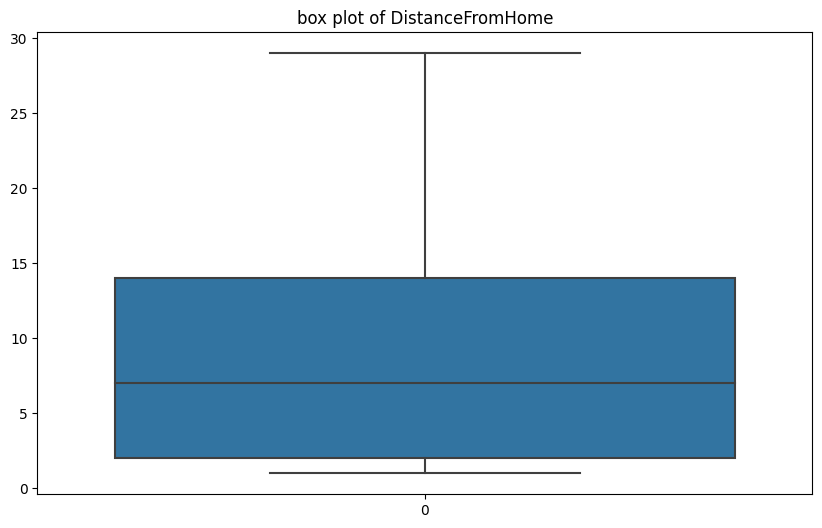

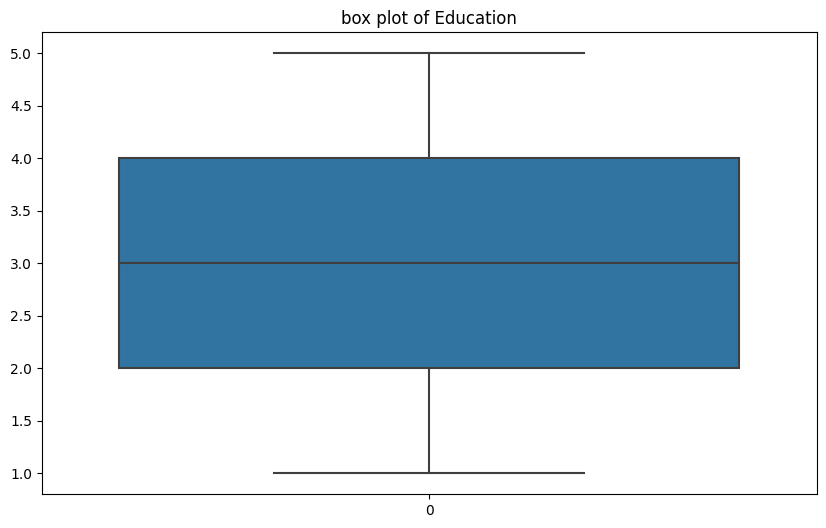

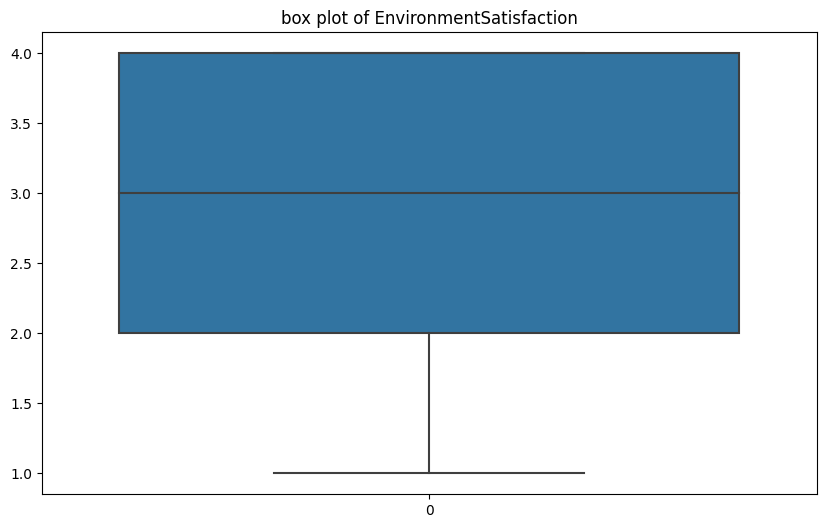

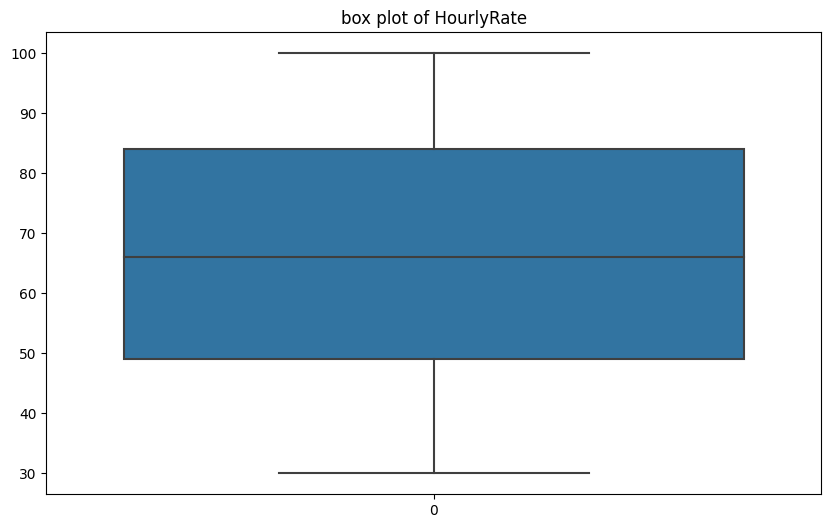

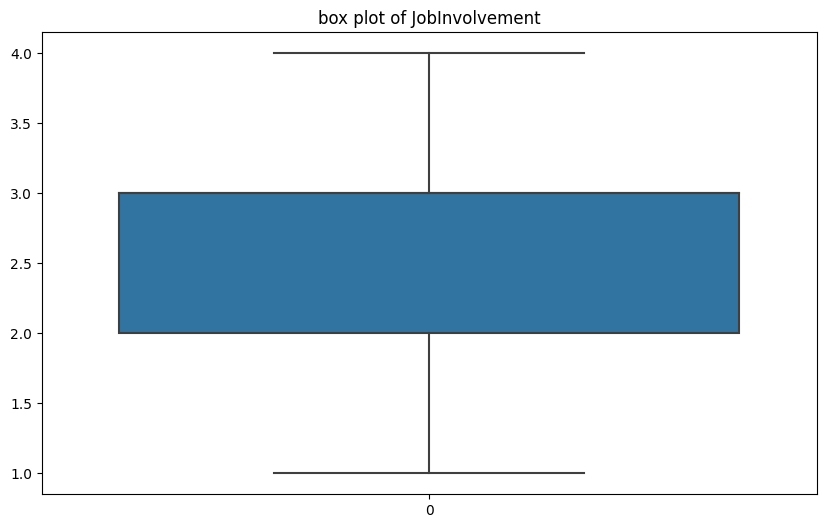

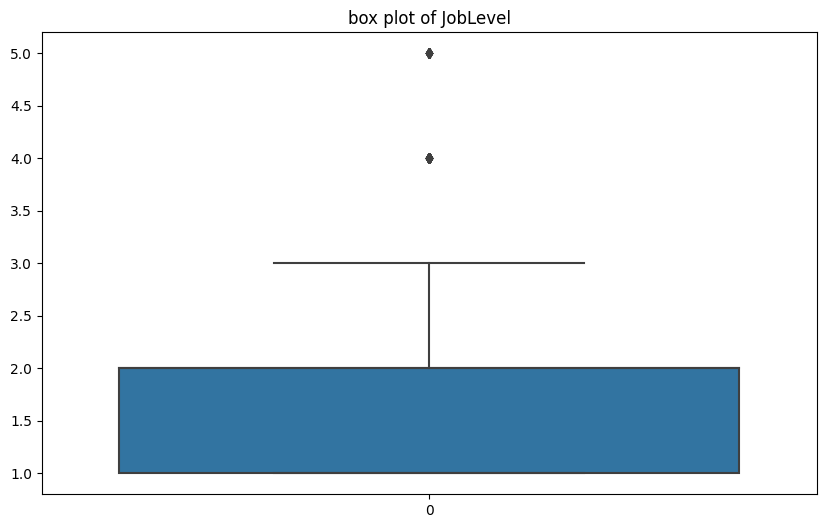

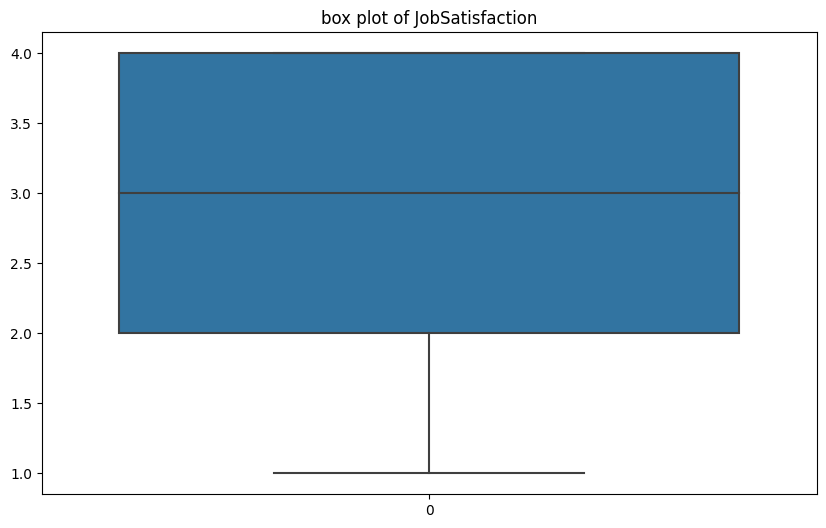

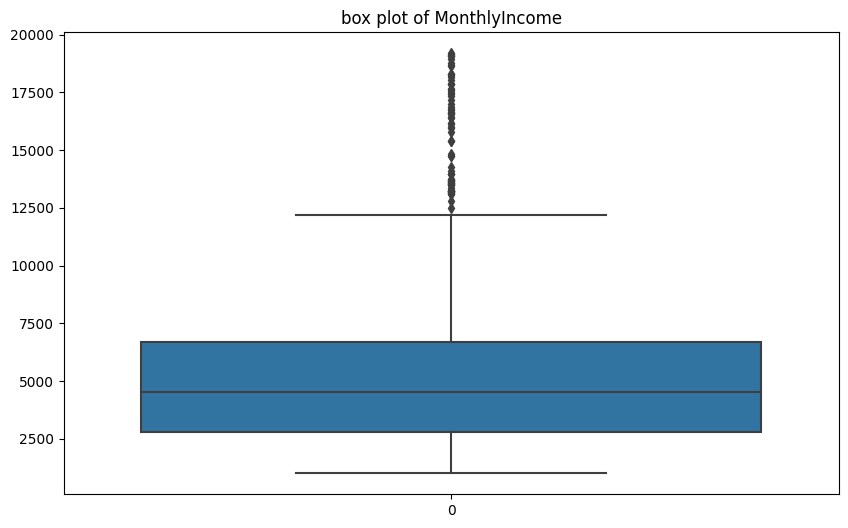

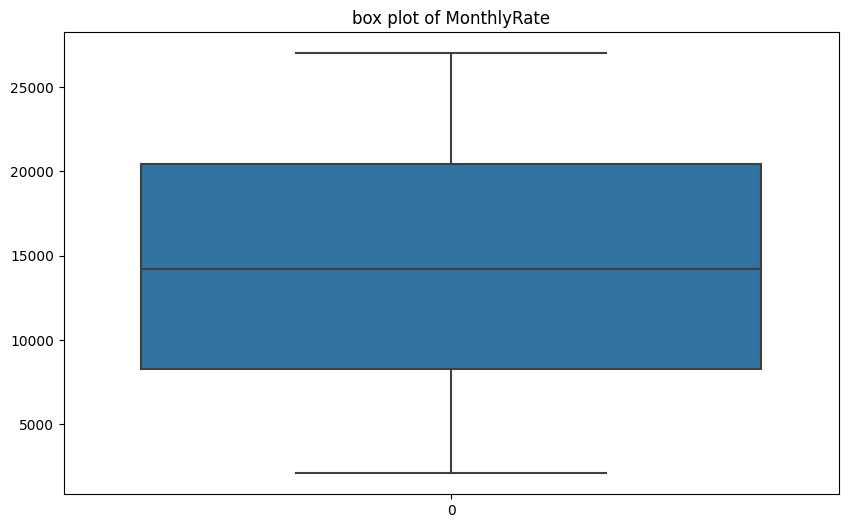

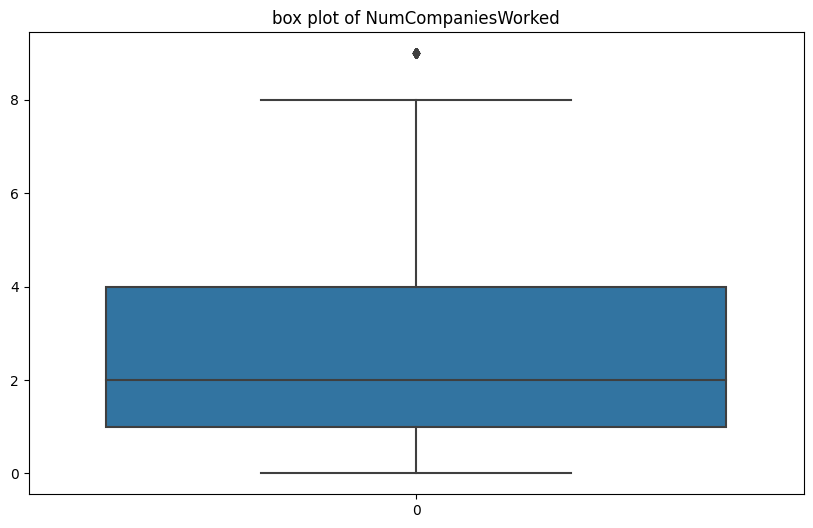

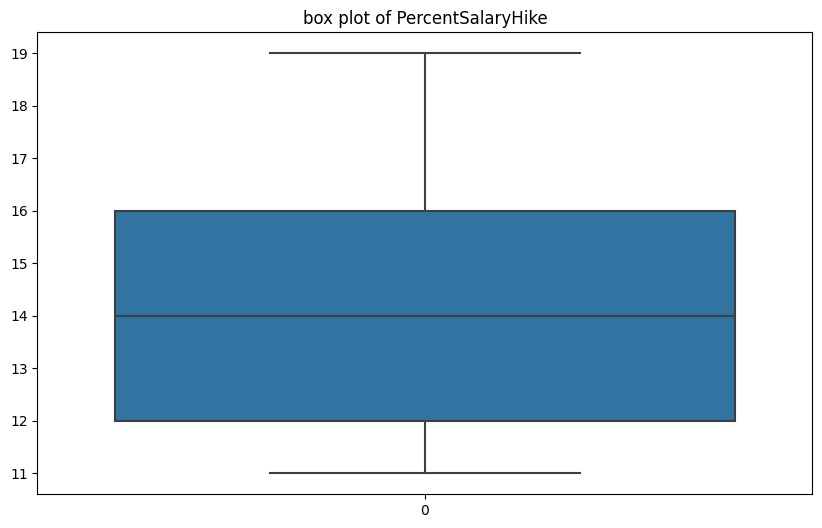

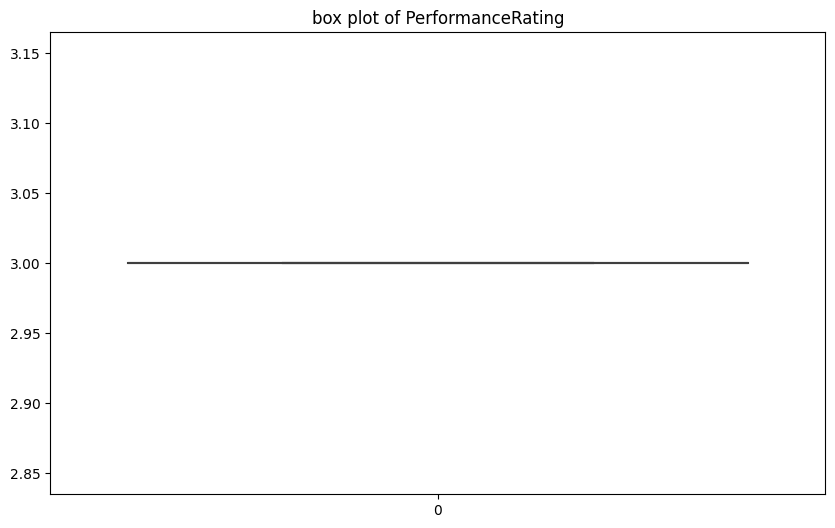

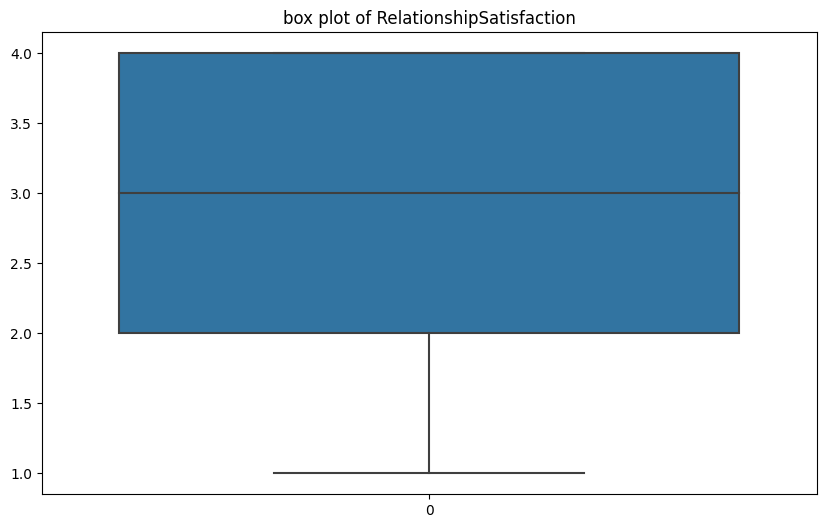

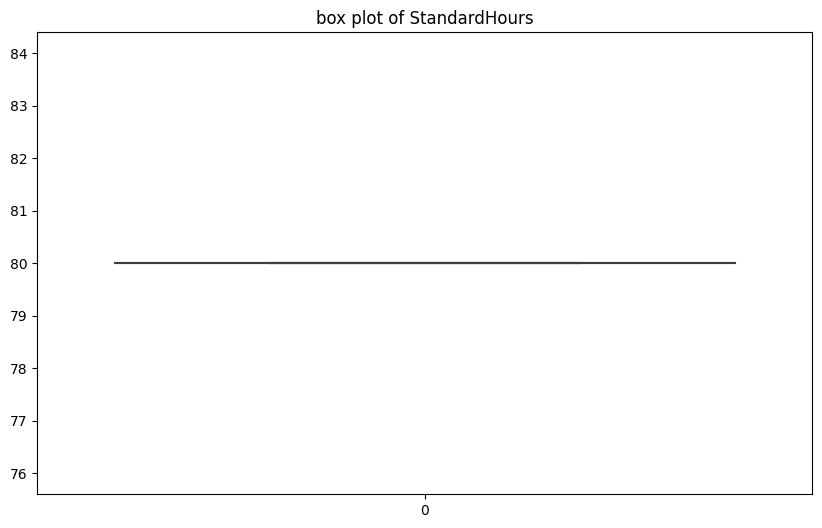

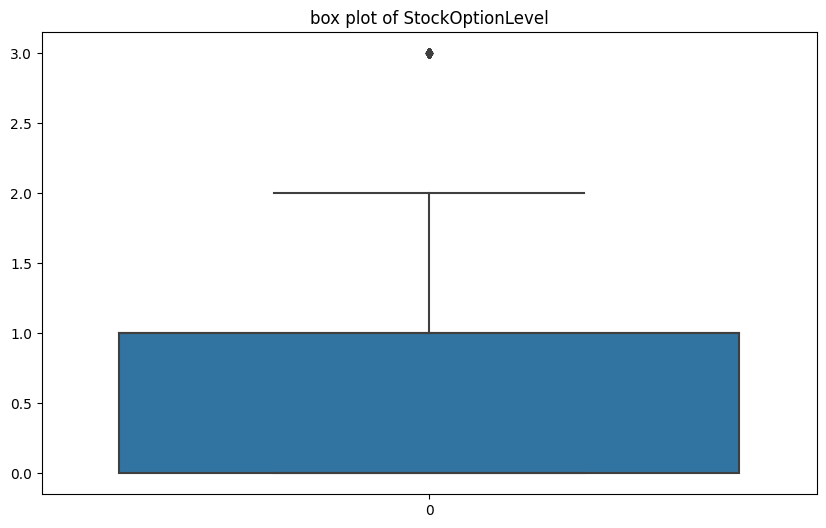

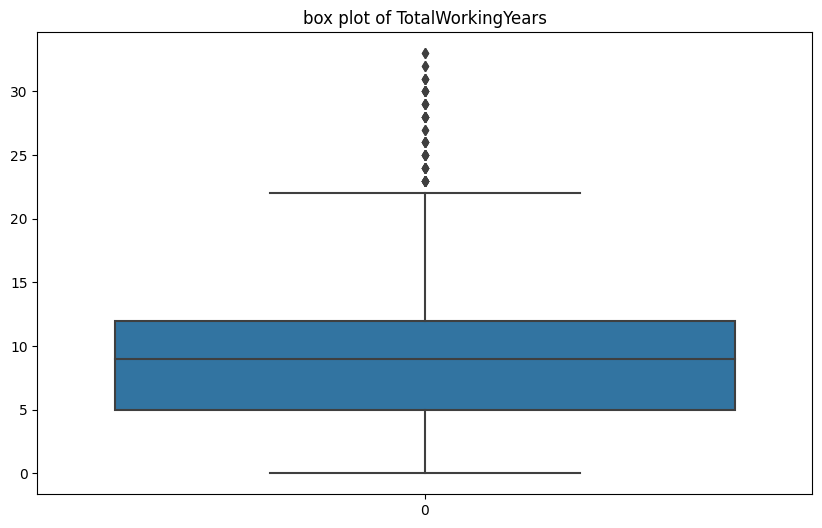

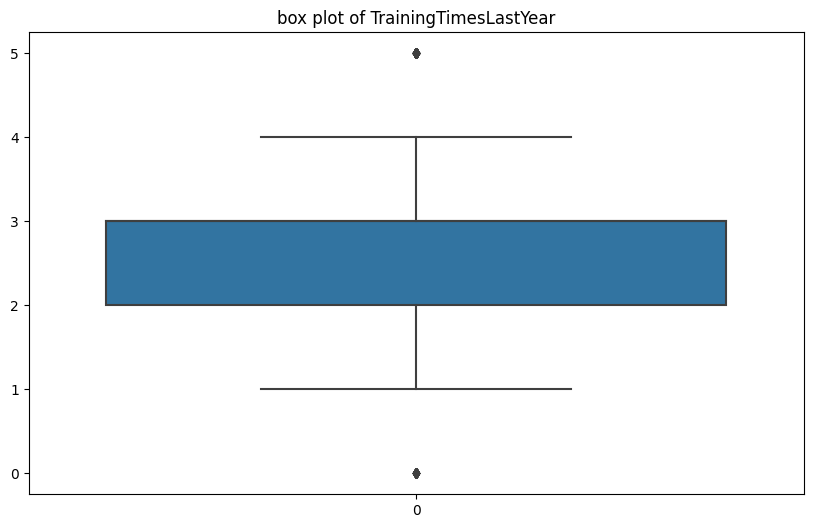

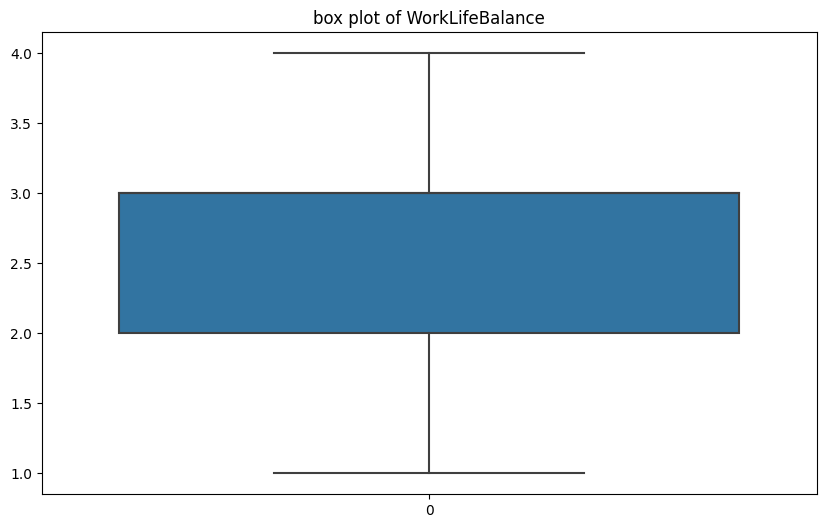

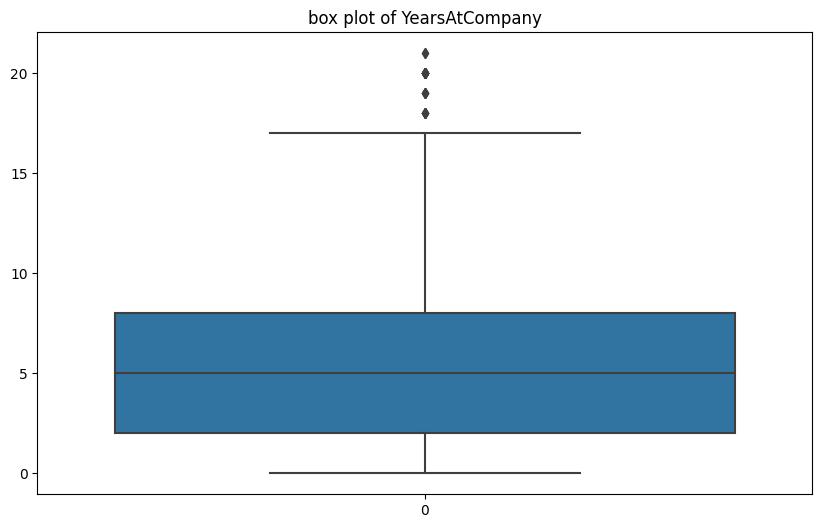

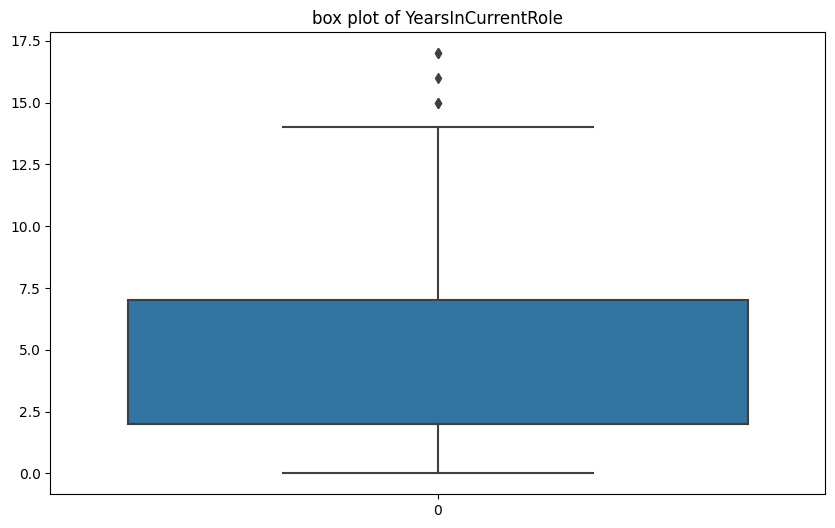

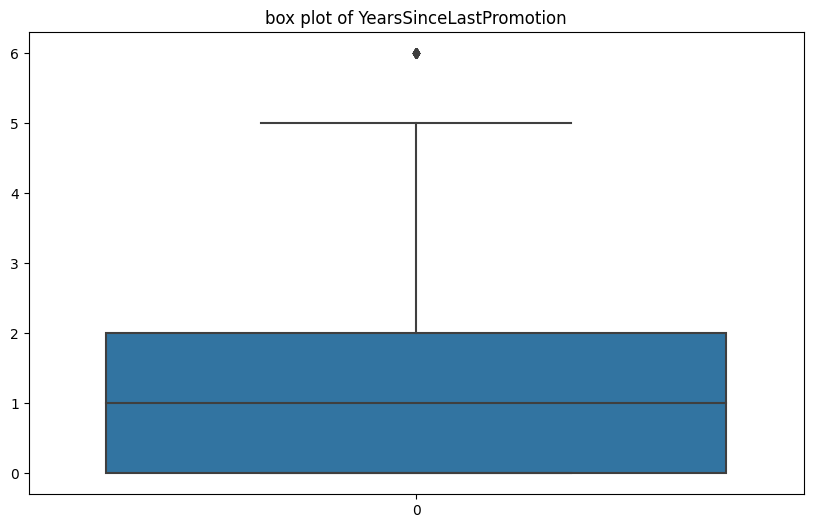

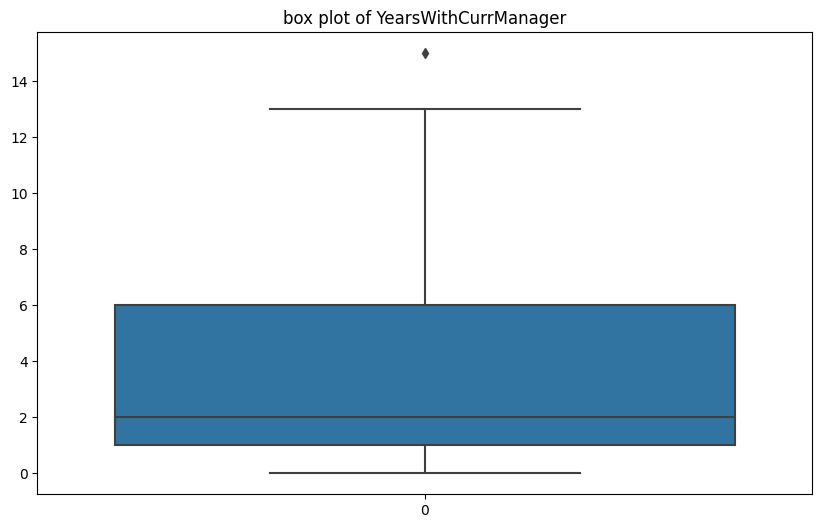

In [16]:
ColsBox = df.select_dtypes('int64')
for col in ColsBox.columns:
    plt.figure(figsize=(10,6))
    plt.title('box plot of '+col)
    sns.boxplot(df[col])
    plt.show()

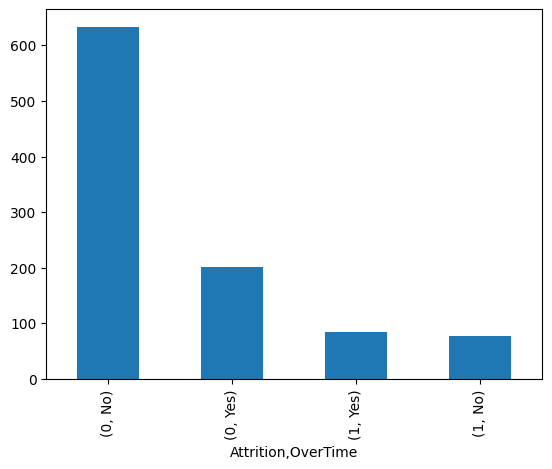

In [17]:
df.groupby('Attrition').OverTime.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


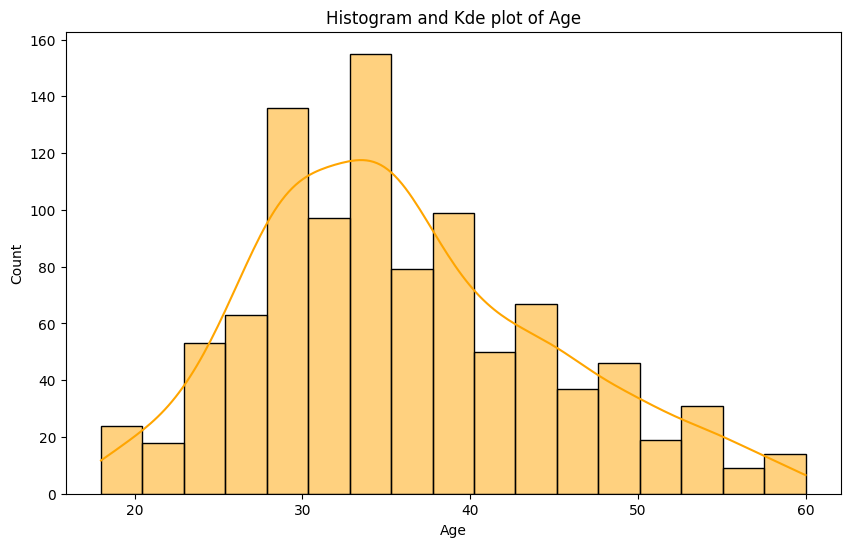

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(df['Age'] , kde = True , color = 'orange')
plt.title('Histogram and Kde plot of Age')
plt.show()

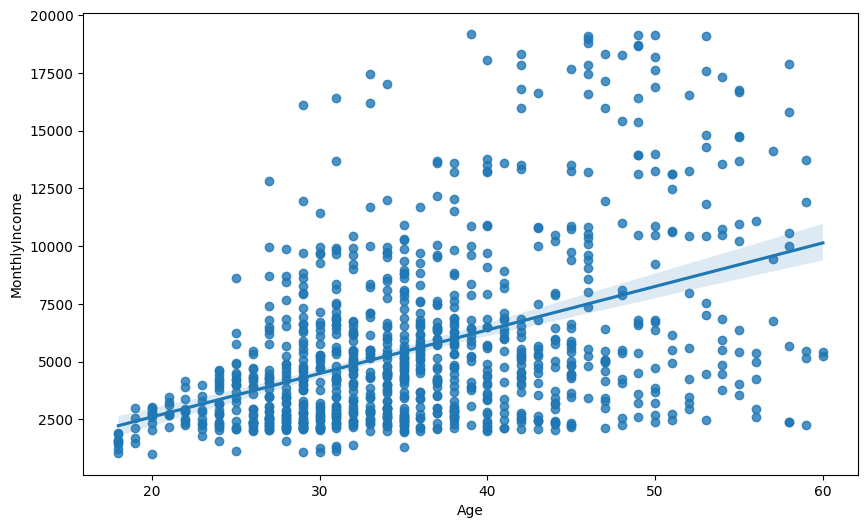

In [19]:
plt.figure(figsize = (10,6))
sns.regplot(x = df['Age'] , y = df['MonthlyIncome'])
plt.show()

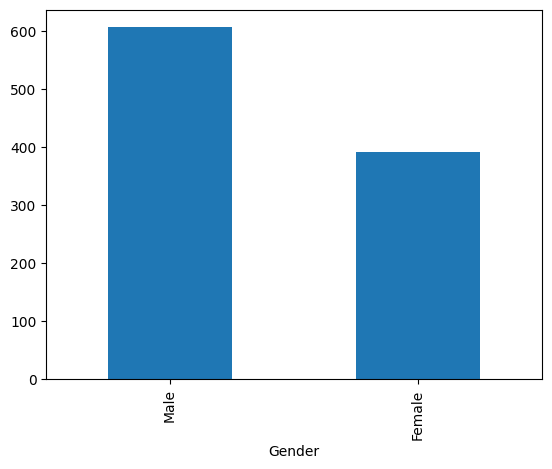

In [20]:
df['Gender'].value_counts().plot(kind = 'bar')
plt.show()

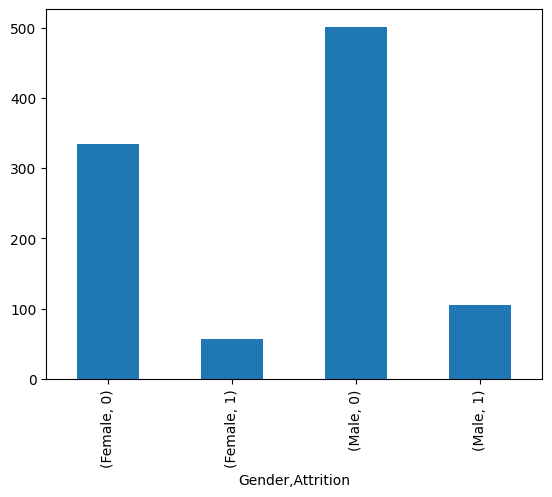

In [21]:
df.groupby('Gender').Attrition.value_counts().plot( kind = 'bar')
plt.show()

In [22]:
print(df['Attrition'].value_counts())

Attrition
0    835
1    162
Name: count, dtype: int64


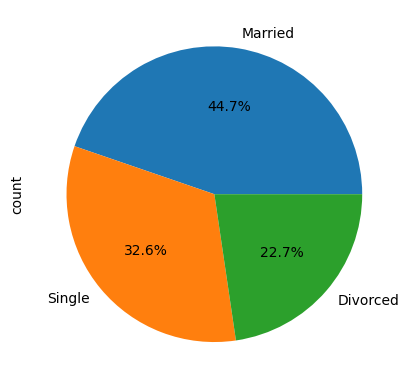

In [23]:
df['MaritalStatus'].value_counts().plot(kind = 'pie' , autopct = "%1.1f%%")
plt.show()

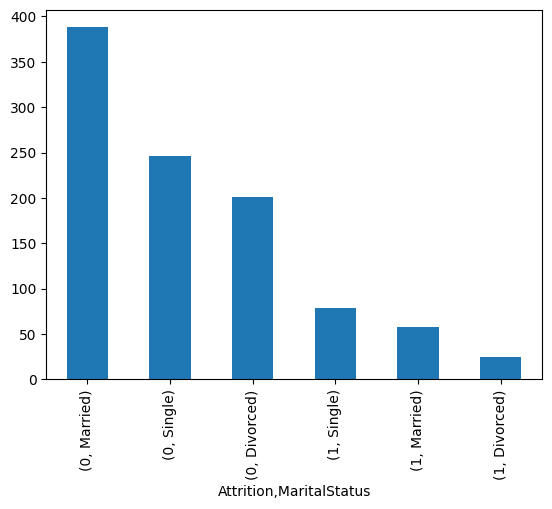

In [24]:
df.groupby('Attrition').MaritalStatus.value_counts().plot(kind = "bar")
plt.show()

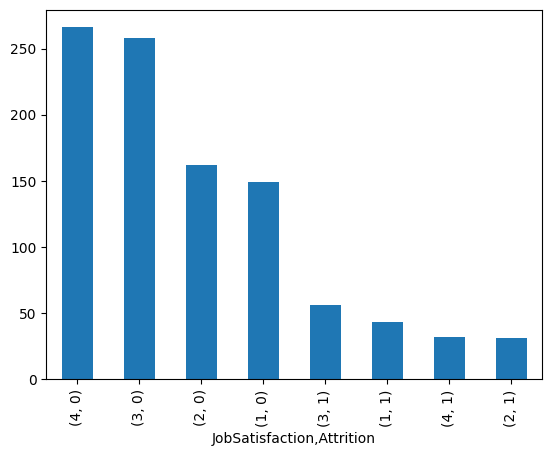

In [25]:
df.groupby('JobSatisfaction').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

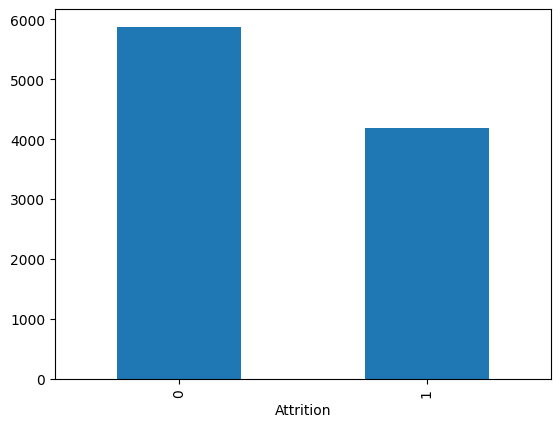

In [26]:
df.groupby('Attrition')['MonthlyIncome'].mean().plot(kind = "bar")
plt.show()

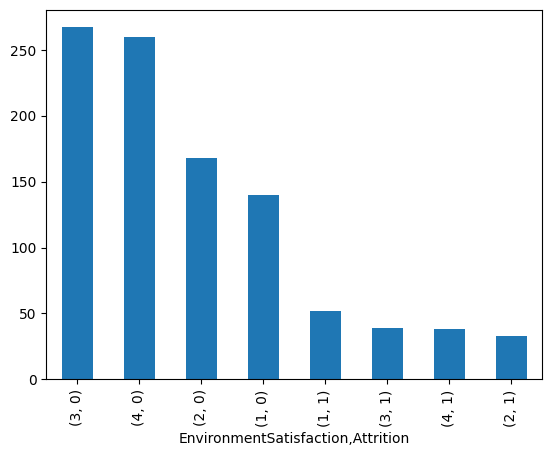

In [27]:
df.groupby('EnvironmentSatisfaction').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

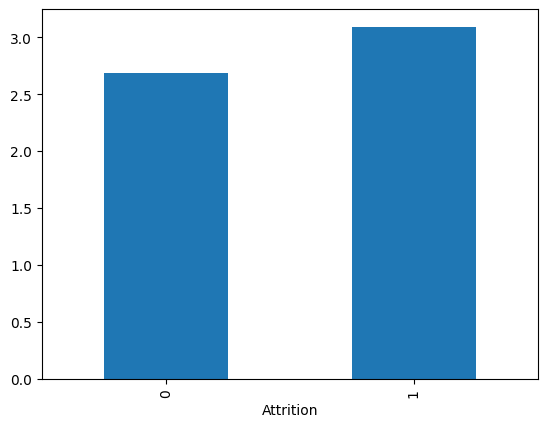

In [28]:
df.groupby('Attrition')['NumCompaniesWorked'].mean().plot(kind = "bar")
plt.show()

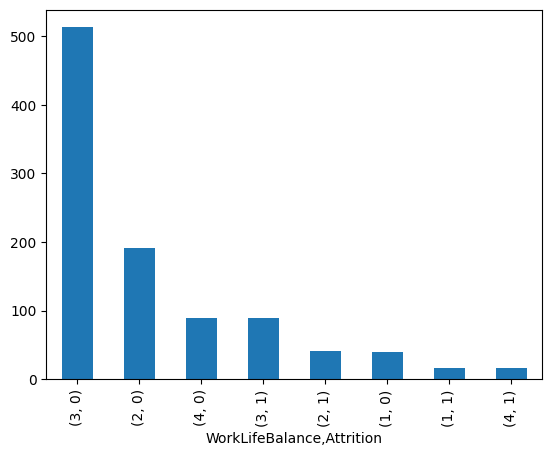

In [29]:
df.groupby('WorkLifeBalance').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

In [30]:
print(df.groupby('Attrition')['Age'].mean())

Attrition
0    36.645509
1    32.271605
Name: Age, dtype: float64


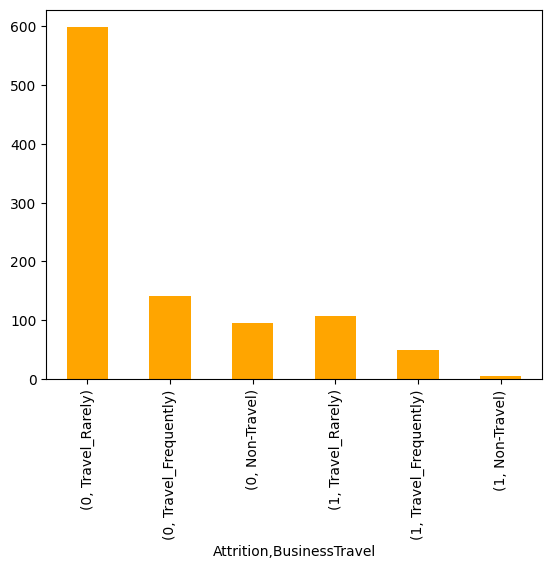

In [31]:
df.groupby('Attrition')['BusinessTravel'].value_counts().plot(kind ='bar' ,color = 'orange')
plt.show()

In [32]:
df['Over18'].value_counts()

Over18
Y    997
Name: count, dtype: int64

In [33]:
df.drop(columns=['Over18'] , inplace = True)

In [34]:
df['Attrition'] = df['Attrition'].astype('int64')

In [35]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        705
Travel_Frequently    190
Non-Travel           102
Name: count, dtype: int64

In [36]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'Travel_Rarely':0 ,'Travel_Frequently':1 , 'Non-Travel':3})

In [37]:
df['BusinessTravel'] = df['BusinessTravel'].astype('int64')

In [38]:
df['Department'] = df['Department'].replace({'Research & Development':0 ,'Sales':1 , 'Human Resources':3})
df['Department'] = df['Department'].astype('int64')

In [39]:
encoder = LabelEncoder()

In [40]:
df['EducationField'] = encoder.fit_transform(df['EducationField'])

In [41]:
df['Gender'] = encoder.fit_transform(df['Gender'])

In [42]:
df['JobRole'] = encoder.fit_transform(df['JobRole'])

In [43]:
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])

In [44]:
df['OverTime'] = encoder.fit_transform(df['OverTime'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       997 non-null    int64
 1   Attrition                 997 non-null    int64
 2   BusinessTravel            997 non-null    int64
 3   DailyRate                 997 non-null    int64
 4   Department                997 non-null    int64
 5   DistanceFromHome          997 non-null    int64
 6   Education                 997 non-null    int64
 7   EducationField            997 non-null    int64
 8   EnvironmentSatisfaction   997 non-null    int64
 9   Gender                    997 non-null    int64
 10  HourlyRate                997 non-null    int64
 11  JobInvolvement            997 non-null    int64
 12  JobLevel                  997 non-null    int64
 13  JobRole                   997 non-null    int64
 14  JobSatisfaction           997 non-null    int6

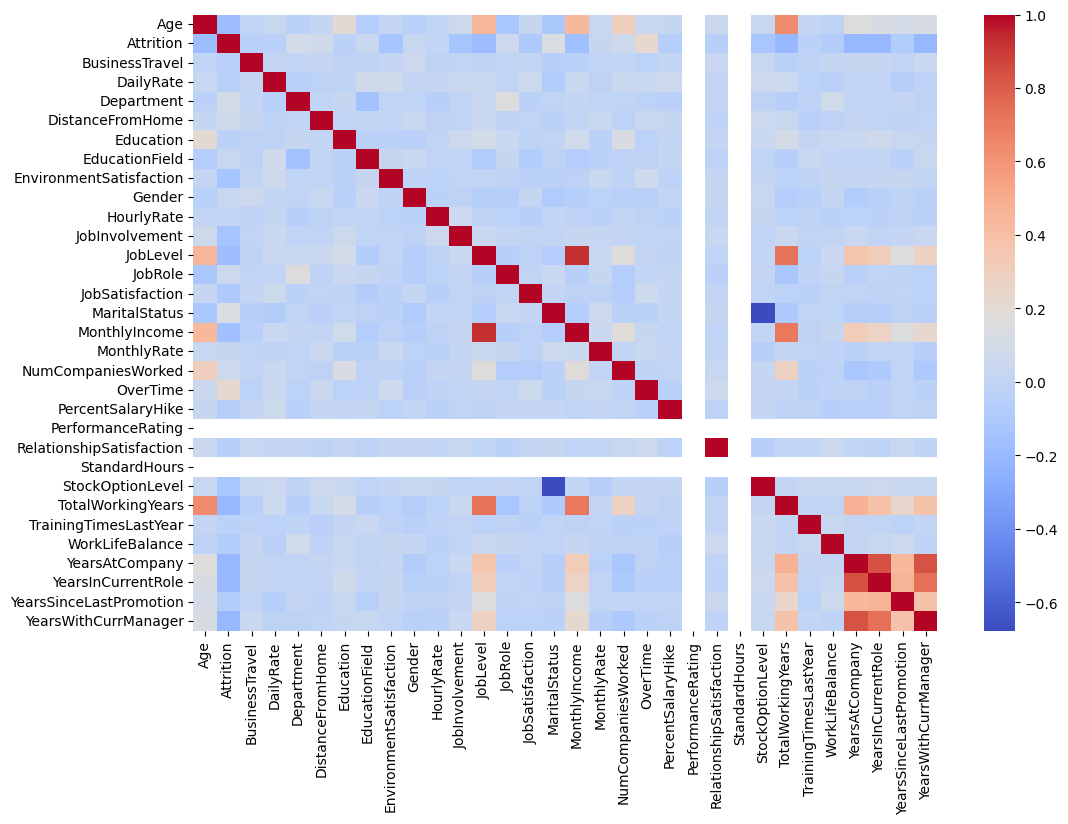

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , cmap = 'coolwarm')
plt.show()

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
2,37,1,0,1373,0,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,0,2,2,1,4,1,...,3,80,0,8,2,2,7,7,3,6


In [48]:
scaler = MinMaxScaler()

In [49]:
df[df.columns] = scaler.fit_transform(df[df.columns])

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.000000,0.716332,0.333333,0.000000,0.25,0.2,0.333333,0.0,...,0.000000,0.0,0.000000,0.242424,0.0,0.000000,0.285714,0.235294,0.000000,0.333333
2,0.452381,1.0,0.000000,0.910458,0.000000,0.035714,0.25,0.8,1.000000,1.0,...,0.333333,0.0,0.000000,0.212121,0.6,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.333333,0.924069,0.000000,0.071429,0.75,0.2,1.000000,0.0,...,0.666667,0.0,0.000000,0.242424,0.6,0.666667,0.380952,0.411765,0.500000,0.000000
4,0.214286,0.0,0.000000,0.350287,0.000000,0.035714,0.00,0.6,0.000000,1.0,...,1.000000,0.0,0.333333,0.181818,0.6,0.666667,0.095238,0.117647,0.333333,0.133333
5,0.333333,0.0,0.333333,0.646848,0.000000,0.035714,0.25,0.2,1.000000,1.0,...,0.666667,0.0,0.000000,0.242424,0.4,0.333333,0.333333,0.411765,0.500000,0.400000


In [51]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

In [52]:
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"F2 Score: {f2:.2f}")
    print("---------------------------")

Classifier: Decision Tree
Accuracy: 0.80
Precision: 0.38
Recall: 0.38
F1 Score: 0.38
F2 Score: 0.38
---------------------------
Classifier: Random Forest
Accuracy: 0.85
Precision: 1.00
Recall: 0.09
F1 Score: 0.17
F2 Score: 0.11
---------------------------
Classifier: Logistic Regression
Accuracy: 0.86
Precision: 0.65
Recall: 0.34
F1 Score: 0.45
F2 Score: 0.38
---------------------------
Classifier: SVM
Accuracy: 0.85
Precision: 0.80
Recall: 0.12
F1 Score: 0.22
F2 Score: 0.15
---------------------------
Classifier: KNN
Accuracy: 0.81
Precision: 0.22
Recall: 0.06
F1 Score: 0.10
F2 Score: 0.07
---------------------------
Classifier: Gradient Boosting
Accuracy: 0.85
Precision: 0.58
Recall: 0.22
F1 Score: 0.32
F2 Score: 0.25
---------------------------
Classifier: Naive Bayes
Accuracy: 0.77
Precision: 0.39
Recall: 0.78
F1 Score: 0.52
F2 Score: 0.65
---------------------------


In [53]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=60)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
acc=accuracy*100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print("Random Forest")
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy: {acc:.2f} %")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"F2 Score: {f2:.2f}")

Random Forest
Accuracy: 0.9760
Accuracy: 97.60 %
Precision: 0.96
Recall: 0.99
F1 Score: 0.98
F2 Score: 0.98


**Finally we have selected the Random Forest which has 97% Accuracy.**